## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

In [1]:
%tensorflow_version 2.x
import tensorflow as tf

TensorFlow 2.x selected.


### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [0]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### Find no.of samples are there in training and test datasets

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
x_test.shape

(10000, 28, 28)

### Find dimensions of an image in the dataset

In [8]:
x_train.ndim

3

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [11]:
import numpy as np
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [0]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes= 10, dtype='float32')
y_test =  tf.keras.utils.to_categorical(y_test, num_classes= 10, dtype='float32')

### Normalize both the train and test image data from 0-255 to 0-1

In [14]:
x_train.dtype

dtype('uint8')

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


In [0]:
x_train = x_train/255
x_test = x_test/255

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [0]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

### Import the necessary layers from keras to build the model

In [0]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from tensorflow.keras.layers import Convolution2D, MaxPooling2D

### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [0]:
model2 = Sequential()
model2.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
model2.add(Activation('relu'))
model2.add(Convolution2D(32, 3, 3))
model2.add(Activation('relu'))
model2.add(Flatten())
model2.add(Dense(128))
model2.add(Activation('relu'))
model2.add(Dense(10))
model2.add(Activation('softmax'))

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [0]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

In [0]:
BATCH_SIZE = 32
EPOCHS = 10

In [31]:
  model2.fit(x_train, y_train, batch_size=BATCH_SIZE, nb_epoch=EPOCHS, 
              validation_data=(x_test, y_test), callbacks=callback_list)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 105us/sample - loss: 0.5123 - accuracy: 0.8164 - val_loss: 0.4045 - val_accuracy: 0.8516
Epoch 2/10
 1504/60000 [..............................] - ETA: 6s - loss: 0.3673 - accuracy: 0.8590

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:842: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


60000/60000 [==============================] - 6s 104us/sample - loss: 0.3531 - accuracy: 0.8708 - val_loss: 0.3579 - val_accuracy: 0.8700
Epoch 3/10
60000/60000 [==============================] - 6s 107us/sample - loss: 0.3101 - accuracy: 0.8851 - val_loss: 0.3544 - val_accuracy: 0.8736
Epoch 4/10
60000/60000 [==============================] - 6s 106us/sample - loss: 0.2823 - accuracy: 0.8958 - val_loss: 0.3113 - val_accuracy: 0.8862
Epoch 5/10
60000/60000 [==============================] - 6s 102us/sample - loss: 0.2618 - accuracy: 0.9023 - val_loss: 0.3235 - val_accuracy: 0.8820
Epoch 6/10
60000/60000 [==============================] - 6s 101us/sample - loss: 0.2459 - accuracy: 0.9083 - val_loss: 0.3134 - val_accuracy: 0.8875
Epoch 7/10
60000/60000 [==============================] - 6s 103us/sample - loss: 0.2309 - accuracy: 0.9141 - val_loss: 0.2980 - val_accuracy: 0.8960
Epoch 8/10
60000/60000 [==============================] - 6s 105us/sample - loss: 0.2182 - accuracy: 0.9183 - v

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [0]:
BATCH_SIZE = 32
EPOCHS = 10


In [0]:
model3 = Sequential()

In [0]:
 model3.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
 model3.add(Activation('relu'))

model3.add(Convolution2D(32, 3, 3))
model3.add(Activation('relu'))

model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Dropout(0.25))

model3.add(Flatten())
model3.add(Dense(128))
model3.add(Activation('relu'))
model3.add(Dropout(0.5))

model3.add(Dense(10))
model3.add(Activation('softmax'))




In [0]:
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=7, verbose=1, mode='auto')
callback_list = [early_stopping]


In [46]:
 model3.fit(x_train, y_train, batch_size=BATCH_SIZE, nb_epoch=EPOCHS, 
              validation_data=(x_test, y_test), callbacks=callback_list)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 112us/sample - loss: 1.0267 - accuracy: 0.6267 - val_loss: 0.6665 - val_accuracy: 0.7503
Epoch 2/10
 1856/60000 [..............................] - ETA: 5s - loss: 0.8294 - accuracy: 0.6988

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:842: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


60000/60000 [==============================] - 6s 102us/sample - loss: 0.7555 - accuracy: 0.7311 - val_loss: 0.6000 - val_accuracy: 0.7867
Epoch 3/10
60000/60000 [==============================] - 6s 105us/sample - loss: 0.6935 - accuracy: 0.7522 - val_loss: 0.5691 - val_accuracy: 0.7967
Epoch 4/10
60000/60000 [==============================] - 6s 105us/sample - loss: 0.6603 - accuracy: 0.7643 - val_loss: 0.5461 - val_accuracy: 0.7983
Epoch 5/10
60000/60000 [==============================] - 6s 105us/sample - loss: 0.6379 - accuracy: 0.7707 - val_loss: 0.5216 - val_accuracy: 0.8102
Epoch 6/10
60000/60000 [==============================] - 6s 103us/sample - loss: 0.6175 - accuracy: 0.7780 - val_loss: 0.5135 - val_accuracy: 0.8101
Epoch 7/10
60000/60000 [==============================] - 6s 105us/sample - loss: 0.5998 - accuracy: 0.7823 - val_loss: 0.5085 - val_accuracy: 0.8138
Epoch 8/10
60000/60000 [==============================] - 6s 106us/sample - loss: 0.5896 - accuracy: 0.7873 - v

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=90,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

In [0]:
datagen.fit(x_train)

In [74]:
x_train.dtype

dtype('float32')

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

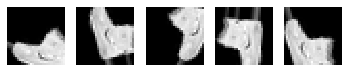

In [59]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [61]:
model3.fit_generator(datagen.flow(x_train, y_train,batch_size=32),
                      steps_per_epoch=len(x_train) / 32, epochs=10,
                    validation_data=(x_test, y_test), callbacks=callback_list)
                    

  ...
    to  
  ['...']
Train for 1875.0 steps, validate on 10000 samples
Epoch 1/10
1875/1875 [==============================] - 18s 9ms/step - loss: 1.5204 - accuracy: 0.4443 - val_loss: 1.4571 - val_accuracy: 0.4997
Epoch 2/10
  18/1875 [..............................] - ETA: 18s - loss: 1.5218 - accuracy: 0.4566

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:842: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


1875/1875 [==============================] - 18s 9ms/step - loss: 1.5172 - accuracy: 0.4441 - val_loss: 1.4348 - val_accuracy: 0.4977
Epoch 3/10
1875/1875 [==============================] - 18s 9ms/step - loss: 1.5133 - accuracy: 0.4466 - val_loss: 1.4486 - val_accuracy: 0.5034
Epoch 4/10
1875/1875 [==============================] - 18s 10ms/step - loss: 1.5034 - accuracy: 0.4507 - val_loss: 1.4243 - val_accuracy: 0.5028
Epoch 5/10
1875/1875 [==============================] - 18s 9ms/step - loss: 1.5021 - accuracy: 0.4499 - val_loss: 1.4507 - val_accuracy: 0.5040
Epoch 6/10
1875/1875 [==============================] - 18s 10ms/step - loss: 1.4992 - accuracy: 0.4536 - val_loss: 1.4776 - val_accuracy: 0.4947
Epoch 7/10
1875/1875 [==============================] - 18s 10ms/step - loss: 1.4859 - accuracy: 0.4572 - val_loss: 1.4768 - val_accuracy: 0.4911
Epoch 8/10
1875/1875 [==============================] - 18s 9ms/step - loss: 1.4937 - accuracy: 0.4522 - val_loss: 1.4427 - val_accuracy: 

###  Report the final train and validation accuracy

In [62]:
loss_and_metrics = model3.evaluate(x_train, y_train)
print(loss_and_metrics)

60000/60000 [==============================] - 4s 62us/sample - loss: 1.3870 - accuracy: 0.5176
[1.3870490597724914, 0.5175833]


## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### **Load CIFAR10 dataset**

In [0]:
(x_train2, y_train2), (x_test2, y_test2) = tf.keras.datasets.cifar10.load_data()


In [65]:
x_train2.shape

(50000, 32, 32, 3)

In [66]:
y_train2.shape

(50000, 1)

In [0]:
x_train2 = x_train2.astype('float32')

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
data_gen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=90,width_shift_range=0.2,height_shift_range=0.2)
    
    

### **Prepare/fit the generator.**

In [0]:
data_gen.fit(x_train2)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

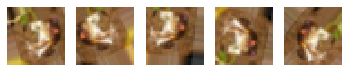

In [81]:
from matplotlib import pyplot as plt
gen = data_gen.flow(x_train2[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze().astype('uint8'), cmap='gray')
    plt.plot()
plt.show()